<a href="https://colab.research.google.com/github/IA2021UR/trabajo-ia-en-la-comunidad-de-la-rioja-equipo-6/blob/main/PruebaModeloRioja2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install semtorch

     |████████████████████████████████| 51kB 6.9MB/s 
     |████████████████████████████████| 29.2MB 138kB/s 
     |████████████████████████████████| 204kB 59.7MB/s 
     |████████████████████████████████| 61kB 8.2MB/s 
  Created wheel for semtorch: filename=SemTorch-0.1.1-cp37-none-any.whl size=50551 sha256=2f2b5912f141fb720be23554124dcf3a485bfdec452bdfba7fea26cd04920826
  Stored in directory: /root/.cache/pip/wheels/f6/da/9f/726f9d2f054d71afa59afeca3f4672464001e9e3f2924d959e
Successfully built semtorch
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scikit-image 0.16.2
    Uninstalling scikit-image-0.16.2:
      Successfully uninstalled scikit-image-0.16.2
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [2]:
!pip install fastai --upgrade

Requirement already up-to-date: fastai in /usr/local/lib/python3.7/dist-packages (2.3.1)


In [3]:
from fastai.basics import *
from fastai.vision import models
from fastai.vision.all import *
from fastai.metrics import *
from fastai.data.all import *
from fastai.callback import *


from pathlib import Path
import random
from semtorch import get_segmentation_learner

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [4]:
!wget https://www.dropbox.com/s/d18cyp95ovmldj1/dataset_final.zip?dl=0 -O dataset.zip

--2021-05-30 09:18:10--  https://www.dropbox.com/s/d18cyp95ovmldj1/dataset_final.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/d18cyp95ovmldj1/dataset_final.zip [following]
--2021-05-30 09:18:10--  https://www.dropbox.com/s/raw/d18cyp95ovmldj1/dataset_final.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd3b362eb79e8f3bcf8f4a3a66d.dl.dropboxusercontent.com/cd/0/inline/BPe3AHFEH-06y0kiAOxHvOF-TbCFEWv3tNyYieKfkY1Phr_0C6qvxcu0PWX4fiZSQK3thRb-j5dWNgf430hspsBhoShDII3xaG8RRENxn4jICy3kg_MFAFJRaeOkaYWTjXcJ8f23xLlGydg7KzCRuZAO/file# [following]
--2021-05-30 09:18:13--  https://ucd3b362eb79e8f3bcf8f4a3a66d.dl.dropboxusercontent.com/cd/0/inline/BPe3AHFEH-06y0kiAOxHvOF-TbCFEWv3tNyYieKfkY1Phr_0C6qvxcu0PWX4fiZSQK3thR

In [5]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset_prueba_RIOJA/
 extracting: dataset_prueba_RIOJA/codes.txt  
   creating: dataset_prueba_RIOJA/Images/
   creating: dataset_prueba_RIOJA/Images/test/
 extracting: dataset_prueba_RIOJA/Images/test/foto1.jpg  
   creating: dataset_prueba_RIOJA/Images/train/
  inflating: dataset_prueba_RIOJA/Images/train/22678915_15.tiff  
  inflating: dataset_prueba_RIOJA/Images/train/22678930_15.tiff  
  inflating: dataset_prueba_RIOJA/Images/train/22678945_15.tiff  
  inflating: dataset_prueba_RIOJA/Images/train/22678960_15.tiff  
  inflating: dataset_prueba_RIOJA/Images/train/22678975_15.tiff  
  inflating: dataset_prueba_RIOJA/Images/train/22678990_15.tiff  
  inflating: dataset_prueba_RIOJA/Images/train/22679005_15.tiff  
  inflating: dataset_prueba_RIOJA/Images/train/22679020_15.tiff  
   creating: dataset_prueba_RIOJA/Images/val/
  inflating: dataset_prueba_RIOJA/Images/val/22978945_15.tiff  
  inflating: dataset_prueba_RIOJA/Images/val/23429155_15.tiff  


In [6]:
path=Path('dataset_prueba_RIOJA/')

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [8]:
imagen = cv2.imread('dataset_prueba_RIOJA/Images/test/foto1.jpg', cv2.IMREAD_UNCHANGED)
dsize = (1500, 1500)
output = cv2.resize(imagen, dsize)
cv2.imwrite('dataset_prueba_RIOJA/Images/test/foto1.jpg', output) 

True

In [9]:
output.shape

(1500, 1500, 3)

In [10]:
import os

def recortar_en_trozos(imagen_ruta, altoyancho):
  imagen = cv2.imread(imagen_ruta)
  nombre = imagen_ruta.split('/')[3]
  carpeta2 = imagen_ruta.split('/')[2]
  carpeta1 = imagen_ruta.split('/')[1]
  extension = nombre.split('.')
  ancho = altoyancho
  alto = altoyancho
  i = 0
  for y in range(0,1500,300):
    for x in range(0,1500,300):
      i = i + 1
      recorte = imagen[y:y+altoyancho, x:x+altoyancho]
      cv2.imwrite('dataset_prueba_RIOJA/'+ carpeta1 + '/' + carpeta2 +'/' + extension[0] + '_' + str(i) + '.'+ extension[1], recorte)
  
  os.remove(imagen_ruta)

In [11]:
recortar_en_trozos('dataset_prueba_RIOJA/Images/test/foto1.jpg', 300)

In [15]:
path_images = path/"Images"

In [12]:
codes = np.loadtxt(path/'codes.txt', dtype=str)

In [14]:
testDB = DataBlock(blocks=(ImageBlock, MaskBlock(codes)),
                   get_items=partial(get_image_files,folders=['test']),
                   item_tfms=[Resize((300,300))],
                   batch_tfms=Normalize.from_stats(*imagenet_stats)
                  )

In [16]:
bs = 4
testDLS = testDB.dataloaders(path_images,bs=bs)

In [17]:
!wget https://www.dropbox.com/s/plytu2dsv0nzf5m/models.zip?dl=0 -O models.zip

--2021-05-30 09:21:21--  https://www.dropbox.com/s/plytu2dsv0nzf5m/models.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/plytu2dsv0nzf5m/models.zip [following]
--2021-05-30 09:21:21--  https://www.dropbox.com/s/raw/plytu2dsv0nzf5m/models.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3c3664ff2652e6b72d87108410.dl.dropboxusercontent.com/cd/0/inline/BPfP6kYmpcYmJ5CPiUFdC_jFHNOqzh03ZJhcZSQX2XFFgLBG9yB44NVXEez8K5ahCWQlPQWqQn5H7FHWZDDUCZgG9NJK4UpQYOvmABg60EMX_iKRZlEbSOZa9suZUFsVctcQ4haWfKXZ2uBW6BEi0IvS/file# [following]
--2021-05-30 09:21:21--  https://uc3c3664ff2652e6b72d87108410.dl.dropboxusercontent.com/cd/0/inline/BPfP6kYmpcYmJ5CPiUFdC_jFHNOqzh03ZJhcZSQX2XFFgLBG9yB44NVXEez8K5ahCWQlPQWqQn5H7FHWZDDUCZgG9NJ

In [18]:
!unzip models.zip

Archive:  models.zip
   creating: models/
  inflating: models/hrnet.pth        


In [19]:
import torch
torch.cuda.empty_cache()

In [20]:
learn = get_segmentation_learner(dls=testDLS,number_classes=2,segmentation_type='Semantic Segmentation',
                                 architecture_name='hrnet',backbone_name='hrnet_w30',
                                 metrics=[Dice(),JaccardCoeff()],pretrained=True).to_fp16()

147942KB [00:03, 45980.72KB/s]                            
/usr/local/lib/python3.7/dist-packages/torch/cuda/amp/autocast_mode.py:118: UserWarning: torch.cuda.amp.autocast only affects CUDA ops, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.autocast only affects CUDA ops, but CUDA is not available.  Disabling.")


In [21]:
learn.load('hrnet')

In [22]:
fnames = get_image_files(path_images/'test')

In [46]:
dl = learn.dls.test_dl(fnames[7:8])

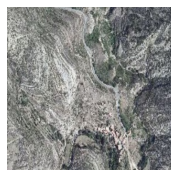

In [47]:
dl.show_batch()

In [48]:
preds = learn.get_preds(dl=dl)

/usr/local/lib/python3.7/dist-packages/torch/cuda/amp/grad_scaler.py:116: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


In [49]:
preds[0].shape

torch.Size([1, 2, 300, 300])

In [50]:
preds_1 = preds[0][0]

In [51]:
preds_1

TensorImage([[[0.9734, 0.9734, 0.9748,  ..., 0.8739, 0.8746, 0.8746],
         [0.9734, 0.9734, 0.9748,  ..., 0.8739, 0.8746, 0.8746],
         [0.9733, 0.9733, 0.9748,  ..., 0.8809, 0.8822, 0.8822],
         ...,
         [0.8081, 0.8081, 0.8016,  ..., 0.9475, 0.9494, 0.9494],
         [0.8048, 0.8048, 0.7979,  ..., 0.9463, 0.9481, 0.9481],
         [0.8048, 0.8048, 0.7979,  ..., 0.9463, 0.9481, 0.9481]],

        [[0.0266, 0.0266, 0.0252,  ..., 0.1261, 0.1254, 0.1254],
         [0.0266, 0.0266, 0.0252,  ..., 0.1261, 0.1254, 0.1254],
         [0.0267, 0.0267, 0.0252,  ..., 0.1191, 0.1178, 0.1178],
         ...,
         [0.1919, 0.1919, 0.1984,  ..., 0.0525, 0.0506, 0.0506],
         [0.1952, 0.1952, 0.2021,  ..., 0.0537, 0.0519, 0.0519],
         [0.1952, 0.1952, 0.2021,  ..., 0.0537, 0.0519, 0.0519]]])

In [52]:
preds_arx = (preds_1).argmax(dim=0)

In [53]:
np.unique(preds_arx)

array([0, 1])

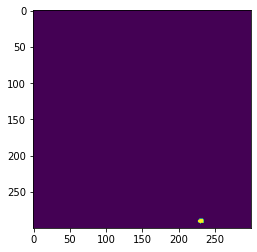

In [54]:
plt.imshow(preds_arx)